<a href="https://colab.research.google.com/github/npradeep96/IDRBlocks/blob/master/IDR_LLM_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount data
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks/ML_for_IDRs'

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/ML_for_IDRs


In [ ]:
import pandas as pd
! pip install biopython
from Bio import SeqIO
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
from tqdm import tqdm
import h5py
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 39.1 MB/s eta 0:00:00


In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import T5Tokenizer, T5EncoderModel

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Import dataset

In [ ]:
data_matrix = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML_for_IDRs/data_matrix.csv')
data_matrix.head(20)

,Uniprot ID,IDR Sequence List,IDR Sequence Combined,IDR Count,Total IDR Length,Fraction Positive,Fraction Negative,Fraction Expanding,FCR,NCPR,Kappa,Omega,Isoelectric Point,Uversky Hydropathy,PPII Propensity,Delta,Delta Max,SCD,Log Partition Ratios
0,Q8WUM0,['FPAAPSPRTPGTGSRRGPLAGLGPGSTPRTASRKGLPL'],FPAAPSPRTPGTGSRRGPLAGLGPGSTPRTASRKGLPL,1.0,38.0,0.157895,0.000000,0.368379,0.157852,0.157852,0.242429,0.053462,14.499987,0.433333,0.426842,0.023065,0.095141,1.334377,10.371906
1,Q9NVP1,['NLTLSETQNGDVSEETMGSRKVKKSKQKPMNVGLSETQNGGMSQ...,NLTLSETQNGDVSEETMGSRKVKKSKQKPMNVGLSETQNGGMSQEA...,1.0,138.0,0.181159,0.181159,0.405402,0.361924,-0.000133,0.402122,0.181223,7.000000,0.340419,0.391667,0.139929,0.347977,-3.062043,9.565771
2,Q8N7H5,['DKSGSGEDESSEDEARAARDKEEIFGSDADSEDDADSDDEDRGQ...,DKSGSGEDESSEDEARAARDKEEIFGSDADSEDDADSDDEDRGQAQ...,1.0,102.0,0.078431,0.313725,0.414803,0.395195,-0.231872,0.253720,0.121241,3.609375,0.314270,0.315980,0.070581,0.278184,14.806040,9.189393
3,Q8WUA4,['SPGQEVLNQLDVKTSSEMTSAEASVEMSLPTPLPGFEDSPDQRR...,SPGQEVLNQLDVKTSSEMTSAEASVEMSLPTPLPGFEDSPDQRRLP...,2.0,255.0,0.164706,0.149020,0.479416,0.314710,0.015757,0.320499,0.070002,8.750000,0.371373,0.448118,0.097659,0.304710,-3.284487,9.121233
4,Q8WVC0,['ADMEDLFGSDADSEAERKDSDSGSDSDSDQENAASGSNASGSES...,ADMEDLFGSDADSEAERKDSDSGSDSDSDQENAASGSNASGSESDQ...,3.0,456.0,0.120614,0.346491,0.509185,0.471904,-0.220657,0.226271,0.102102,3.882812,0.276827,0.360570,0.084354,0.372802,127.322525,9.007168
5,P55884,['QDAENVAVPEAAEERAEPGQQQPAAEPPPAEGLLRPAGPGAPEA...,QDAENVAVPEAAEERAEPGQQQPAAEPPPAEGLLRPAGPGAPEAAG...,1.0,157.0,0.050955,0.248408,0.446737,0.300240,-0.196211,0.111375,0.037347,3.500000,0.389314,0.435223,0.024696,0.221737,21.077413,8.627768
6,Q9Y5Q8,['LFSSSAKADGGKEQLTYESGEDEEDEEEEEEEEEDFKPSDGSEN...,LFSSSAKADGGKEQLTYESGEDEEDEEEEEEEEEDFKPSDGSENEM...,1.0,54.0,0.055556,0.444444,0.518157,0.499638,-0.388703,0.604509,0.300250,3.281250,0.328189,0.349630,0.149423,0.247181,11.883401,7.997080
7,P55081,"['SVPSALMKQPPIQSTAGAVPVRNEKG', 'VSGKRPDYAPMESS...",SVPSALMKQPPIQSTAGAVPVRNEKGVSGKRPDYAPMESSDEEDEE...,2.0,178.0,0.146067,0.331461,0.528732,0.478170,-0.184310,0.343609,0.075862,3.937500,0.327778,0.392191,0.138866,0.404138,17.644652,7.713330
8,Q9UBU9,['ADEGKSYSEHDDERVNFPQRKKKGRGPFRWKYGEGNRRSGRGGS...,ADEGKSYSEHDDERVNFPQRKKKGRGPFRWKYGEGNRRSGRGGSGI...,1.0,84.0,0.226190,0.178571,0.466120,0.406597,0.049555,0.325540,0.053614,10.062500,0.298942,0.354048,0.123157,0.378316,-1.146155,7.690745
9,Q8IX01,"['SGSVAHSRDAGREGLRSDVFPGPSFRSSNPSI', 'RATTGTQT...",SGSVAHSRDAGREGLRSDVFPGPSFRSSNPSIRATTGTQTLLSSGT...,3.0,198.0,0.070707,0.202020,0.417808,0.276394,-0.128340,0.290060,0.155521,3.937500,0.390685,0.405758,0.066557,0.229458,4.407218,7.650883


In [ ]:
data_matrix.describe()

,IDR Count,Total IDR Length,Fraction Positive,Fraction Negative,Fraction Expanding,FCR,NCPR,Kappa,Omega,Isoelectric Point,Uversky Hydropathy,PPII Propensity,Delta,Delta Max,SCD,Log Partition Ratios
count,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000
mean,2.293668,190.222162,0.143337,0.155362,0.416545,0.301813,-0.009218,0.248728,0.170126,7.562398,0.355894,0.408230,0.059863,0.242669,3.667438,0.252371
std,2.106919,267.544894,0.082754,0.100643,0.105166,0.128833,0.131495,0.147247,0.121777,3.204692,0.053241,0.050111,0.042068,0.118429,24.864038,2.981080
min,1.000000,25.000000,0.000000,0.000000,0.052521,0.000000,-0.759432,-1.000000,0.005422,1.750000,0.143928,0.183107,0.000000,0.000000,-55.427329,-6.835415
25%,1.000000,48.000000,0.084389,0.086957,0.352250,0.213889,-0.064195,0.170169,0.101439,4.375000,0.325178,0.379016,0.030376,0.161390,-0.727035,-1.862596
50%,2.000000,103.000000,0.132796,0.137931,0.413697,0.290191,0.002304,0.226925,0.144121,7.000000,0.360875,0.405771,0.049537,0.234057,0.056790,0.119152
75%,3.000000,226.000000,0.187500,0.200000,0.479737,0.375887,0.058752,0.308180,0.204779,10.062500,0.391704,0.435684,0.078264,0.310657,2.041941,2.414201
max,24.000000,3108.000000,0.514286,0.760000,0.836311,0.836311,0.463884,1.000000,1.192246,14.499987,0.534156,0.671600,0.349907,0.818542,839.796075,10.371906


In [ ]:
# Select only the Uniprot IDs, sequences, and the partition ratios
selected_columns = ['Uniprot ID', 'IDR Sequence Combined', 'Total IDR Length', 'Log Partition Ratios']
data_matrix = data_matrix[selected_columns]

# Select only the protein sequences that have a partition ratio of > 2 or < -2 for classification
def assign_labels(pr):
  if pr > 1.0:
    return 1
  elif pr < -1.0:
    return 0
  else:
    return -1

data_matrix['Enrichment Label'] = data_matrix['Log Partition Ratios'].apply(assign_labels)

# Drop the columns that contain Enrichment Label of -1
data_matrix.drop(data_matrix[data_matrix['Enrichment Label'] == -1].index, inplace=True)

# Drop the IDR sequences that have a length larger than 650 as my LLM starts
# struggling to generate embeddings with 16 GB RAM
data_matrix.drop(data_matrix[data_matrix['Total IDR Length'] > 650.0].index, inplace=True)

data_matrix.head(20)


<ipython-input-8-bc3d408aa5ae>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_matrix['Enrichment Label'] = data_matrix['Log Partition Ratios'].apply(assign_labels)
<ipython-input-8-bc3d408aa5ae>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_matrix.drop(data_matrix[data_matrix['Enrichment Label'] == -1].index, inplace=True)
<ipython-input-8-bc3d408aa5ae>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,Uniprot ID,IDR Sequence Combined,Total IDR Length,Log Partition Ratios,Enrichment Label
0,Q8WUM0,FPAAPSPRTPGTGSRRGPLAGLGPGSTPRTASRKGLPL,38.0,10.371906,1
1,Q9NVP1,NLTLSETQNGDVSEETMGSRKVKKSKQKPMNVGLSETQNGGMSQEA...,138.0,9.565771,1
2,Q8N7H5,DKSGSGEDESSEDEARAARDKEEIFGSDADSEDDADSDDEDRGQAQ...,102.0,9.189393,1
3,Q8WUA4,SPGQEVLNQLDVKTSSEMTSAEASVEMSLPTPLPGFEDSPDQRRLP...,255.0,9.121233,1
4,Q8WVC0,ADMEDLFGSDADSEAERKDSDSGSDSDSDQENAASGSNASGSESDQ...,456.0,9.007168,1
5,P55884,QDAENVAVPEAAEERAEPGQQQPAAEPPPAEGLLRPAGPGAPEAAG...,157.0,8.627768,1
6,Q9Y5Q8,LFSSSAKADGGKEQLTYESGEDEEDEEEEEEEEEDFKPSDGSENEM...,54.0,7.997080,1
7,P55081,SVPSALMKQPPIQSTAGAVPVRNEKGVSGKRPDYAPMESSDEEDEE...,178.0,7.713330,1
8,Q9UBU9,ADEGKSYSEHDDERVNFPQRKKKGRGPFRWKYGEGNRRSGRGGSGI...,84.0,7.690745,1
9,Q8IX01,SGSVAHSRDAGREGLRSDVFPGPSFRSSNPSIRATTGTQTLLSSGT...,198.0,7.650883,1


In [ ]:
data_matrix.describe()

,Total IDR Length,Log Partition Ratios,Enrichment Label
count,1315.000000,1315.000000,1315.000000
mean,145.152091,0.283951,0.520913
std,133.954045,3.433601,0.499753
min,25.000000,-6.835415,0.000000
25%,45.500000,-2.517689,0.000000
50%,91.000000,1.134908,1.000000
75%,199.000000,3.018257,1.000000
max,641.000000,10.371906,1.000000


## Generate embeddings from ESM2

In [ ]:
model, alphabet = torch.hub.load("facebookresearch/esm:main", "esm2_t33_650M_UR50D")

Using cache found in /root/.cache/torch/hub/facebookresearch_esm_main


In [ ]:
batch_converter = alphabet.get_batch_converter()
model.eval()  # disables dropout for deterministic results

counter = 0
embedding_array = np.zeros([1315, 1280], dtype=float) # Size is dataset length x embedding vector dimensions
# Iterate through the sequences in the dataset and store results in a h5py file
for index, row in data_matrix.iterrows():
  sequence = [(row['Uniprot ID'], row['IDR Sequence Combined'])]
  batch_labels, batch_strs, batch_tokens = batch_converter(sequence)
  batch_lens = (batch_tokens != alphabet.padding_idx).sum(1)
  # Extract per-residue representations (on CPU)
  with torch.no_grad():
      results = model(batch_tokens, repr_layers=[33], return_contacts=True)
  token_representations = results["representations"][33]
  # Generate per-sequence representations via averaging
  # NOTE: token 0 is always a beginning-of-sequence token, so the first residue is token 1.
  for i, tokens_len in enumerate(batch_lens):
      # Note: This loop is running only once
      embedding_array[counter,:] = np.array(token_representations[i, 1 : tokens_len - 1].mean(0))
  counter += 1
  print(counter, index, row['Uniprot ID'])

with h5py.File('esm2_embeddings.hdf5', 'w') as hdf:
  hdf.create_dataset('esm2_embeddings', data=embedding_array)

1 0 Q8WUM0
2 1 Q9NVP1
3 2 Q8N7H5
4 3 Q8WUA4
5 4 Q8WVC0
6 5 P55884
7 6 Q9Y5Q8
8 7 P55081
9 8 Q9UBU9
10 9 Q8IX01
11 10 O75643
12 11 Q8NAV1
13 12 O95400
14 13 Q6P158
15 14 Q5BKZ1
16 15 Q14764
17 17 Q9Y2X3
18 18 Q8WYQ5
19 19 Q96ST2
20 20 Q7L2E3
21 21 Q6PD62
22 22 P62995
23 23 Q08211
24 24 Q96EE3
25 25 Q14692
26 26 Q9Y580
27 27 Q96NB3
28 28 O60306
29 29 P62847
30 30 Q6P2E9
31 31 Q8N2M8
32 32 O43823
33 33 O75821
34 34 Q9Y5B9
35 35 Q8N8A6
36 36 P49711
37 37 Q6PL18
38 38 Q9HCS7
39 39 Q96T37
40 40 Q9Y2R4
41 41 Q9H1A4
42 42 Q9P2I0
43 43 Q9BUQ8
44 44 Q9P253
45 45 Q12873
46 46 O15372
47 47 O60287
48 48 Q8N201
49 49 Q99666
50 50 Q99575
51 51 Q9UKM9
52 52 P52948
53 53 Q9UHI6
54 54 O15371
55 55 Q99613
56 56 Q9BQS8
57 57 P57740
58 58 O00566
59 59 O43290
60 60 Q13033
61 62 Q8NBZ0
62 63 Q13427
63 64 Q86Y91
64 65 Q5SY16
65 66 Q9Y5S2
66 67 P62314
67 68 Q9HCE1
68 69 Q15061
69 70 Q96LT9
70 71 O00267
71 72 Q08379
72 73 Q9Y5Q9
73 74 P0C1Z6
74 76 O75962
75 77 P52756
76 78 Q9UDY2
77 79 Q9NUL3
78 80 Q8NI35
79 81

<ipython-input-20-6f96425f1780>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors, cmap='viridis', s=3)


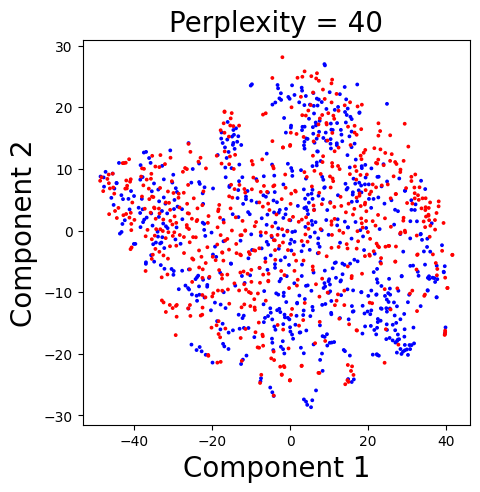

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualize the embedding matrix using tSNE

# Create a TSNE instance: n_components is the dimension of the embedded space

# Fit and transform the data (this step may take some time depending on the size of your data)

for perplexity in [40]:
  tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
  X_embedded = tsne.fit_transform(embedding_array)
  # Plot the transformed data
  plt.figure(figsize=(5, 5))
  colors = ['red' if label == 0 else 'blue' for label in data_matrix['Enrichment Label']]
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors, cmap='viridis', s=3)
  plt.title('t-SNE plot of the data matrix')
  plt.xlabel('Component 1', fontsize=20)
  plt.ylabel('Component 2', fontsize=20)
  plt.title('Perplexity = {}'.format(perplexity), fontsize=20)
  plt.show()
  plt.savefig('tSNE_EMS2_{}.png'.format(perplexity), format='png')

# Generate embeddings using ProtTrans

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load the tokenizer
tokenizer = T5Tokenizer.from_pretrained('Rostlab/prot_t5_xl_half_uniref50-enc', do_lower_case=False)
# Load the model
model = T5EncoderModel.from_pretrained("Rostlab/prot_t5_xl_half_uniref50-enc").to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/656 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


pytorch_model.bin:   0%|          | 0.00/2.42G [00:00<?, ?B/s]

In [ ]:
# only GPUs support half-precision currently; if you want to run on CPU use full-precision (not recommended, much slower)
if device==torch.device("cpu"):
  model.to(torch.float32)

counter = 0
embedding_array = np.zeros([1315, 1024], dtype=float) # Size is dataset length x embedding vector dimensions

for index, row in data_matrix.iterrows():

  # prepare your protein sequences as a list
  sequence_examples = [row['IDR Sequence Combined']]

  # replace all rare/ambiguous amino acids by X and introduce white-space between all amino acids
  sequence_examples = [" ".join(list(re.sub(r"[UZOB]", "X", sequence))) for sequence in sequence_examples]

  # tokenize sequences and pad up to the longest sequence in the batch
  ids = tokenizer(sequence_examples, add_special_tokens=True, padding="longest")

  input_ids = torch.tensor(ids['input_ids']).to(device)
  attention_mask = torch.tensor(ids['attention_mask']).to(device)

  # generate embeddings
  with torch.no_grad():
      embedding_repr = model(input_ids=input_ids, attention_mask=attention_mask)

  embedding_repr_tensor = embedding_repr.last_hidden_state[0,:].mean(dim=0)
  embedding_array[counter, :] = embedding_repr_tensor.cpu().numpy()

  counter += 1
  print(counter, index, row['Uniprot ID'])

with h5py.File('prottrans_embeddings.hdf5', 'w') as hdf:
  hdf.create_dataset('prottrans_embeddings', data=embedding_array)

1 0 Q8WUM0
2 1 Q9NVP1
3 2 Q8N7H5
4 3 Q8WUA4
5 4 Q8WVC0
6 5 P55884
7 6 Q9Y5Q8
8 7 P55081
9 8 Q9UBU9
10 9 Q8IX01
11 10 O75643
12 11 Q8NAV1
13 12 O95400
14 13 Q6P158
15 14 Q5BKZ1
16 15 Q14764
17 17 Q9Y2X3
18 18 Q8WYQ5
19 19 Q96ST2
20 20 Q7L2E3
21 21 Q6PD62
22 22 P62995
23 23 Q08211
24 24 Q96EE3
25 25 Q14692
26 26 Q9Y580
27 27 Q96NB3
28 28 O60306
29 29 P62847
30 30 Q6P2E9
31 31 Q8N2M8
32 32 O43823
33 33 O75821
34 34 Q9Y5B9
35 35 Q8N8A6
36 36 P49711
37 37 Q6PL18
38 38 Q9HCS7
39 39 Q96T37
40 40 Q9Y2R4
41 41 Q9H1A4
42 42 Q9P2I0
43 43 Q9BUQ8
44 44 Q9P253
45 45 Q12873
46 46 O15372
47 47 O60287
48 48 Q8N201
49 49 Q99666
50 50 Q99575
51 51 Q9UKM9
52 52 P52948
53 53 Q9UHI6
54 54 O15371
55 55 Q99613
56 56 Q9BQS8
57 57 P57740
58 58 O00566
59 59 O43290
60 60 Q13033
61 62 Q8NBZ0
62 63 Q13427
63 64 Q86Y91
64 65 Q5SY16
65 66 Q9Y5S2
66 67 P62314
67 68 Q9HCE1
68 69 Q15061
69 70 Q96LT9
70 71 O00267
71 72 Q08379
72 73 Q9Y5Q9
73 74 P0C1Z6
74 76 O75962
75 77 P52756
76 78 Q9UDY2
77 79 Q9NUL3
78 80 Q8NI35
79 81

<ipython-input-12-9446e69fc825>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors, cmap='viridis', s=3)


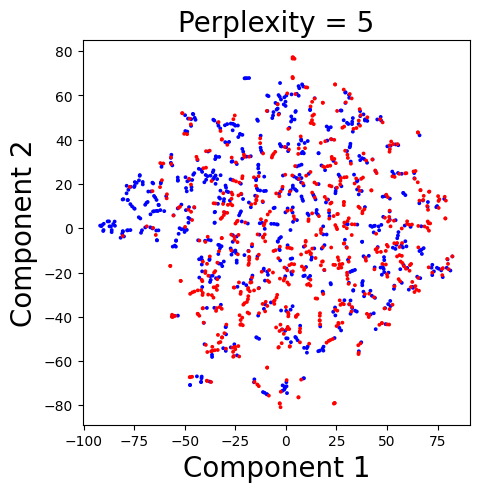

<ipython-input-12-9446e69fc825>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors, cmap='viridis', s=3)


<Figure size 640x480 with 0 Axes>

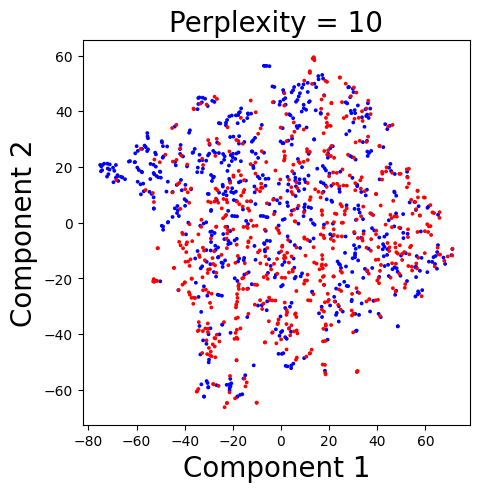

<ipython-input-12-9446e69fc825>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors, cmap='viridis', s=3)


<Figure size 640x480 with 0 Axes>

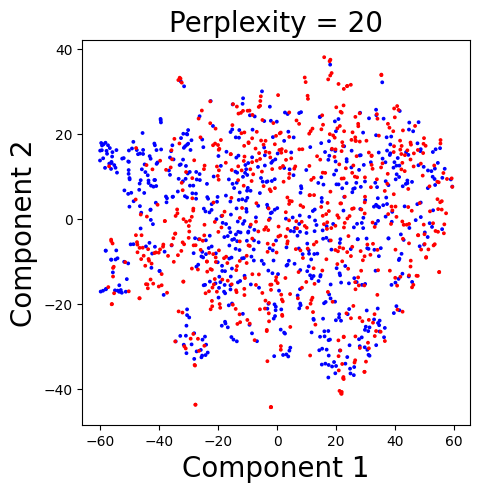

<ipython-input-12-9446e69fc825>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors, cmap='viridis', s=3)


<Figure size 640x480 with 0 Axes>

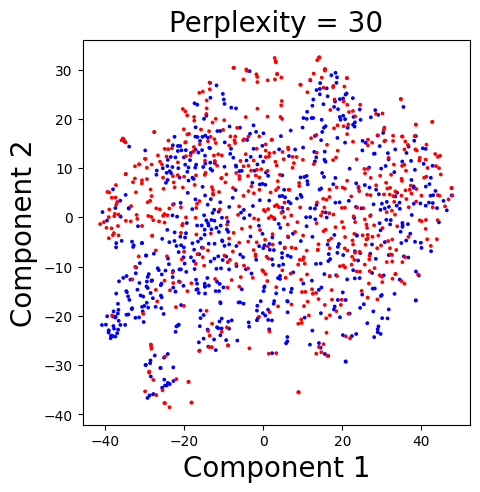

<ipython-input-12-9446e69fc825>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors, cmap='viridis', s=3)


<Figure size 640x480 with 0 Axes>

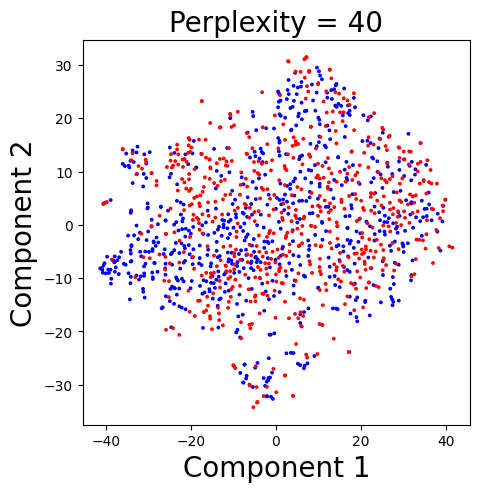

<ipython-input-12-9446e69fc825>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors, cmap='viridis', s=3)


<Figure size 640x480 with 0 Axes>

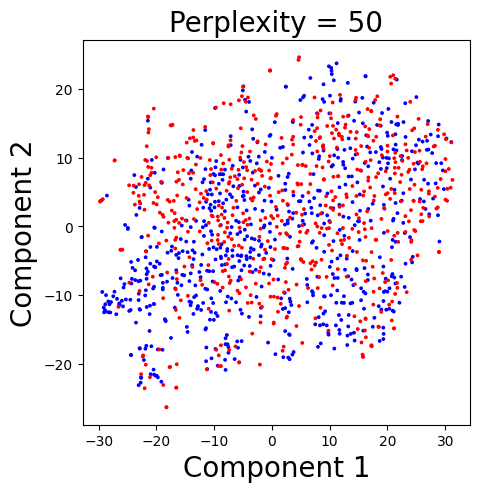

<ipython-input-12-9446e69fc825>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors, cmap='viridis', s=3)


<Figure size 640x480 with 0 Axes>

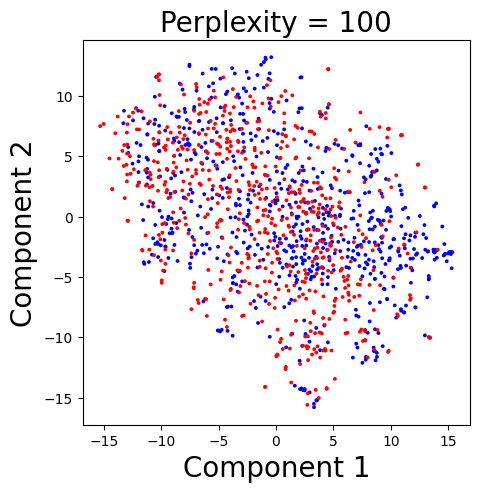

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualize the embedding matrix using tSNE

# Create a TSNE instance: n_components is the dimension of the embedded space

# Fit and transform the data (this step may take some time depending on the size of your data)

for perplexity in [5, 10, 20, 30, 40, 50, 100]:
  tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
  X_embedded = tsne.fit_transform(embedding_array)
  # Plot the transformed data
  plt.figure(figsize=(5, 5))
  colors = ['red' if label == 0 else 'blue' for label in data_matrix['Enrichment Label']]
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors, cmap='viridis', s=3)
  plt.title('t-SNE plot of the data matrix')
  plt.xlabel('Component 1', fontsize=20)
  plt.ylabel('Component 2', fontsize=20)
  plt.title('Perplexity = {}'.format(perplexity), fontsize=20)
  plt.show()
  plt.savefig('tSNE_ProtTrans_{}.png'.format(perplexity), format='png')